## Laptop Bhinneka Web Scraper
### Razan Aditya Putra (18221132)
### Tugas Seleksi Calon Asisten Lab Basis Data

:smiley:

## Import Library Yang Diperlukan

In [7]:
import os
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import json
import requests

## Main Program Untuk Memproses HTML Dari Website

In [28]:
baseurl = 'https://www.bhinneka.com'
url = 'https://www.bhinneka.com/jual?cari=laptop'
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36'}
driver = webdriver.Chrome()
driver.get(url)
Data_Laptop_Bhinneka = []

for i in range(40):
    print("processing data page", i+1)
    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#__next")))
    time.sleep(1)

    for j in range(12):
        driver.execute_script("window.scrollBy(0, 250)")
        time.sleep(1)

    driver.execute_script("window.scrollBy(50, 0)")
    time.sleep(1)
    soup = BeautifulSoup (driver.page_source, "lxml")
    for item in soup.findAll('div', class_='col css-mz9zn6'): 
        nama_produk = item.find('p', class_='css-194yrqz').text
        harga = item.find('div', class_='price').text
        cicilan = item.find('span', class_='extra').text
        link_toko = item.find('a', href=True)
        suburl = baseurl + link_toko['href']
        driver.execute_script("window.open(arguments[0]);", suburl)
        driver.switch_to.window(driver.window_handles[1])
        subsoup = BeautifulSoup(driver.page_source, 'lxml')
        info_detail = []
        try:
            garansi = subsoup.find('div', class_='css-1vpacho').text
            keunggulan = subsoup.find('div', class_='css-zmjj1a').text
            spec = subsoup.find('table', class_='css-14oykdy').text
            desc = subsoup.find('div', class_='css-116d6nl').text
            estimate = subsoup.findAll('div', class_='css-1ksog4')[2].div.text
            rate = subsoup.findAll('div', class_='totalRate')
            for rating in rate:
                star = rating.find('h4').text
            more_detail = {
                "garansi" : garansi,
                "keunggulan" : keunggulan,
                "spesifikasi" : spec,
                "deskripsi" : desc,
                "estimasi" : estimate,
                "rating" : star,
            }
            info_detail.append(more_detail)
            time.sleep(1)
        except AttributeError:
            pass
        except IndexError:
            pass
        except ValueError:
            pass
        
        for item2 in item.findAll('div', class_='merchant-info css-ejq1bh'):
            lokasi = item2.findAll('span')[0].text
            toko = item2.findAll('span')[1].text 

        data_laptop = {
            "nama_produk" : nama_produk,
            "harga" : harga,
            "cicilan" : cicilan,
            "nama_toko" : toko,
            "lokasi_toko" : lokasi,
            "info_detail" : info_detail,
        }
        Data_Laptop_Bhinneka.append(data_laptop)

        driver.close()
        driver.switch_to.window(driver.window_handles[0])

    time.sleep(1)
    driver.find_element(By.CSS_SELECTOR, "button[data-testid^='next-button']").click()
    time.sleep(1)
    driver.execute_script("window.scrollBy(0, -3000)")
    time.sleep(1)

driver.quit()

processing data page 1
processing data page 2
processing data page 3
processing data page 4
processing data page 5
processing data page 6
processing data page 7
processing data page 8
processing data page 9
processing data page 10
processing data page 11
processing data page 12
processing data page 13
processing data page 14
processing data page 15
processing data page 16
processing data page 17
processing data page 18
processing data page 19
processing data page 20
processing data page 21
processing data page 22
processing data page 23
processing data page 24
processing data page 25
processing data page 26
processing data page 27
processing data page 28
processing data page 29
processing data page 30
processing data page 31
processing data page 32
processing data page 33
processing data page 34
processing data page 35
processing data page 36
processing data page 37
processing data page 38
processing data page 39
processing data page 40


In [9]:
path = 'C:\Coding\Python\Seleksi-2023-Tugas-1\Data Scraping\data'
file_name = 'Data_Laptop_Bhinneka.json'
file_path = os.path.join(path, file_name)
with open(file_path, 'w', encoding = 'utf-8') as file:
    json.dump(Data_Laptop_Bhinneka, file, ensure_ascii = False, indent = 4)
print("Done exporting json file.")

NameError: name 'Data_Laptop_Bhinneka' is not defined

In [4]:
data = pd.read_json('C:\Coding\Python\Lab Basdat\Data_Laptop_Bhinneka.json')
data

,nama_produk,harga,cicilan,nama_toko,lokasi_toko,info_detail
0,CORSAIR Memory Notebook 4GB DDR3L PC-12800 CMS...,Rp 449.500,Cicilan Rp 37.459/bln,Bhinneka,Tanjung Priok,[{'garansi': '3 Years Local Official Distribut...
1,Sewa Laptop Amanah Lenovo Legion 5 (Periode 1 ...,Rp 757.000,Cicilan Rp 63.084/bln,Amanah Sewa Laptop,Kebon Jeruk,[]
2,Sewa Laptop Amanah Dell Latitude E3340 (Period...,Rp 151.000,Cicilan Rp 12.584/bln,Amanah Sewa Laptop,Kebon Jeruk,[]
3,Sewa Laptop Amanah HP 820m G2 (Periode 1 Hari),Rp 202.000,Cicilan Rp 16.834/bln,Amanah Sewa Laptop,Kebon Jeruk,[]
4,Sewa Laptop Amanah HP 9480 (Periode 1 Hari),Rp 151.500,Cicilan Rp 12.625/bln,Amanah Sewa Laptop,Kebon Jeruk,[]
...,...,...,...,...,...,...
1595,GEARMAX GM1701 15.4 Inch Classic Fabric Laptop...,Rp 99.000,Cicilan Rp 8.250/bln,lacarla,Grogol Petamburan,[]
1596,EURCOOL EC-1990 Laptop Backpack Bag Ultra Thin...,Rp 575.000,Cicilan Rp 47.917/bln,lacarla,Grogol Petamburan,[]
1597,WIWU GM3909 11.6 Inch Slim Water Resistant Lap...,Rp 240.000,Cicilan Rp 20.000/bln,lacarla,Grogol Petamburan,[]
1598,GEARMAX GM4005 15.6 Inch Waterproof Oxford Lap...,Rp 139.000,Cicilan Rp 11.584/bln,lacarla,Grogol Petamburan,[]


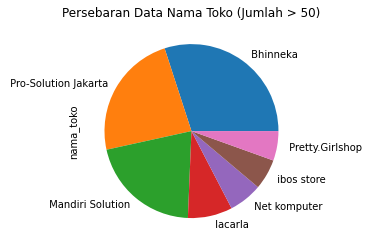

In [37]:
data2 = data["nama_toko"].value_counts()
data3 = data2[data2 > 50]
data3.plot(kind="pie")
plt.title('Persebaran Data Nama Toko (Jumlah > 50)')
plt.show()

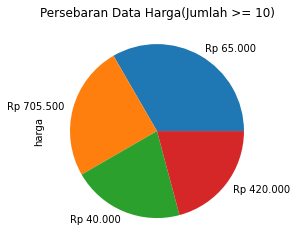

In [38]:
data2 = data["harga"].value_counts()
data3 = data2[data2 >= 10]
data3.plot(kind="pie")
plt.title('Persebaran Data Harga(Jumlah >= 10)')
plt.show()

<AxesSubplot:ylabel='lokasi_toko'>

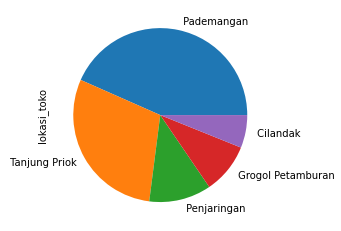

In [47]:
data2 = data["lokasi_toko"].value_counts()
data3 = data2[data2 > 50]
data3.plot(kind="pie")